In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from os.path import join
from datetime import datetime

sns.set_style("darkgrid")

import warnings 
warnings.simplefilter('ignore')

%matplotlib inline

In [6]:

import reverse_geocoder as rg


In [7]:
filename = "taxi-trips.csv"
d_path = "./data"

df = pd.read_csv(join(d_path, filename))

In [8]:
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [9]:
n_rows, n_columns = df.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))


number of rows: 118185, number of columns: 11


In [10]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [11]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [12]:
pickup_long=df['pickup_longitude']
pickup_lat=df['pickup_latitude']
coor_lst1=[]
for i in range (len(pickup_long)) :
    coor_lst1.append((pickup_lat[i],pickup_long[i]))
res1=rg.search(coor_lst1)
coor_name=[]
for i in range (len(res1)):
    coor_name.append(res1[i]["name"])
df["pickup_districts"]=coor_name
df.head()

Loading formatted geocoded file...


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_districts
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City


In [13]:
type(pickup_long)

pandas.core.series.Series

In [14]:
from geopy.distance import geodesic

In [15]:
dropoff_long=df['dropoff_longitude']
dropoff_lat=df['dropoff_latitude']
coor_lst2=[]
for i in range (len(dropoff_long)) :
    coor_lst2.append((dropoff_lat[i],dropoff_long[i]))
res2=rg.search(coor_lst2)
coor_name=[]
for i in range (len(res2)):
    coor_name.append(res2[i]["name"])
df["dropoff_district"]=coor_name
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_districts,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


In [16]:
df_c1=df.groupby(by='pickup_districts')


In [17]:
df_c1.sum()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_districts,,,,,,,
Atlantic Beach,5,4,-2.951244e+02,1.620887e+02,-2.952154e+02,1.624510e+02,4884
Bayonne,20,25,-7.409498e+02,4.066069e+02,-7.409498e+02,4.066069e+02,8084
Bellerose Terrace,2,1,-7.375575e+01,4.071594e+01,-7.375575e+01,4.071594e+01,721
Bensonhurst,31,37,-1.628133e+03,8.938970e+02,-1.627830e+03,8.944064e+02,13547
Borough of Queens,126,125,-5.982144e+03,3.298838e+03,-5.985212e+03,3.299536e+03,74368
Brooklyn,690,777,-3.468981e+04,1.907590e+04,-3.468676e+04,1.908283e+04,466766
Cliffside Park,1,1,-7.399011e+01,4.082701e+01,-7.399011e+01,4.082700e+01,40
Coney Island,6,9,-2.219306e+02,1.216879e+02,-2.220064e+02,1.217413e+02,1428
Cos Cob,1,1,-7.360162e+01,4.102951e+01,-7.360162e+01,4.102951e+01,45


In [18]:
df_c2=df.groupby(by="dropoff_district")
df_c2.sum()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
dropoff_district,,,,,,,
Atlantic Beach,5,5,-295.085747,162.197620,-295.001831,162.140965,2462
Baldwin,1,1,-73.874596,40.774082,-73.612038,40.659595,2472
Barnum Island,2,1,-73.776833,40.645161,-73.628571,40.616970,2007
Bayonne,30,38,-1258.775139,691.649166,-1259.658813,691.091576,106195
Bellerose,7,8,-295.732086,162.922173,-294.870361,162.930954,10562
Bellerose Terrace,62,58,-2658.623375,1464.903107,-2654.975471,1465.903587,53934
Bensonhurst,488,521,-24257.988342,13356.632614,-24273.393822,13324.823742,776859
Bergenfield,2,1,-73.984032,40.760342,-73.995934,40.919319,1506
Bogota,2,1,-73.801132,40.672523,-74.025230,40.884972,1916


In [19]:
df_c1.sum().sort_values(by="passenger_count",ascending=False).head(5)


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_districts,,,,,,,
Manhattan,69855,75120,-3.352973e+06,1.848175e+06,-3.352938e+06,1.847848e+06,37549365
New York City,52987,57657,-2.562118e+06,1.410224e+06,-2.561656e+06,1.410558e+06,31756529
Long Island City,27214,29095,-1.315704e+06,7.248131e+05,-1.315696e+06,7.248043e+05,15730098
Weehawken,17299,18646,-8.386485e+05,4.619023e+05,-8.385004e+05,4.618799e+05,9835587
The Bronx,4313,4796,-2.051336e+05,1.132258e+05,-2.053923e+05,1.131653e+05,5198196


In [20]:
df_c2.sum().sort_values(by="passenger_count",ascending=False).head(5)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
dropoff_district,,,,,,,
Manhattan,68319,73302,-3.290036e+06,1.813063e+06,-3.289959e+06,1.813543e+06,36564897
New York City,47699,51666,-2.299579e+06,1.266260e+06,-2.299950e+06,1.265859e+06,27589140
Long Island City,30565,32965,-1.473404e+06,8.116554e+05,-1.473321e+06,8.116561e+05,17885782
Weehawken,16280,17736,-7.857668e+05,4.328090e+05,-7.858988e+05,4.328488e+05,9226454
Brooklyn,3123,3403,-1.522787e+05,8.383974e+04,-1.522830e+05,8.374173e+04,3396836


In [21]:
coor_paired=[]
for i in range (len(coor_lst1)):
    coor_paired.append((coor_lst1[i],coor_lst2[i]))
    
print(coor_paired[0])

((40.76793670654297, -73.98215484619139), (40.765602111816406, -73.96463012695312))


In [22]:
distance_lst=[]
for i in range (len(coor_lst1)):
    distance_lst.append(geodesic(coor_lst1[i],coor_lst2[i]).miles)
df["distance"]=distance_lst
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_districts,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103


In [23]:
df["pickup_datetime"][0].split(" ")

['2016-03-14', '17:24:55']

In [24]:
date_time=[]
for i in range(len(df["pickup_datetime"])):
     date_time.append(df["pickup_datetime"][i].time())


AttributeError: 'str' object has no attribute 'time'

In [28]:
def assign_hour(hour):
    """
   
    """
    if hour <= '09' and hour >= '07':
        return "rush_hour_morning"
    elif hour > '09' and hour<='16':
        return "afternoon"
    elif hour>'16' and hour<='18':
        return "rush_hour_evening"
    elif hour>'18'and hour<='23':
        return "evening"
    else:
        return "late_night"


In [29]:
df["pickup_datetime"][0][11:13]

'17'

In [30]:
timeday=[]
for i in range (len(coor_lst1)):
    timeday.append(df["pickup_datetime"][i][11:13])


In [31]:
df["time_of_day"]=timeday
df["time_of_day"]=df["time_of_day"].apply(assign_hour)
df.head(50)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_districts,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375,late_night


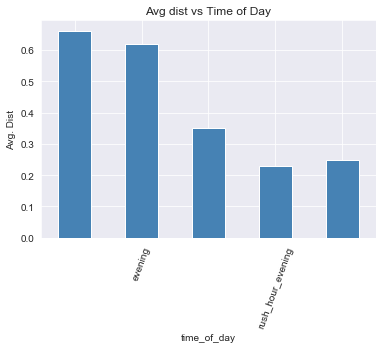

In [33]:

tod_group = df.groupby(by="time_of_day").sum()  
dist_tod = tod_group["distance"] / len(coor_lst1)  

ax = dist_tod.plot(kind="bar",
                   color="steelblue",
                   rot=70)

for tick in ax.xaxis.get_major_ticks()[::2]:  
    tick.label1.set_visible(False)            

plt.ylabel("Avg. Dist")
plt.title("Avg dist vs Time of Day")
plt.show()

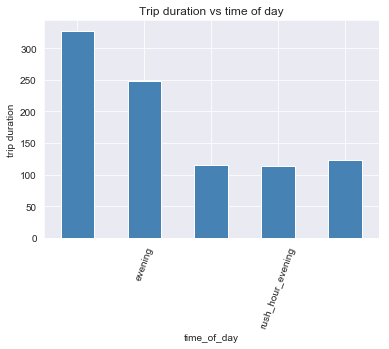

In [35]:
tod_group = df.groupby(by="time_of_day").sum() 
trip_dur = tod_group["trip_duration"] / len(coor_lst1)

ax = trip_dur.plot(kind="bar",
                   color="steelblue",
                   rot=70)

for tick in ax.xaxis.get_major_ticks()[::2]:  
    tick.label1.set_visible(False)            

plt.ylabel("trip duration")
plt.title("Trip duration vs time of day")
plt.show()

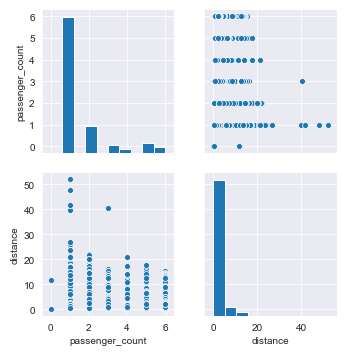

In [36]:
cols = ["passenger_count", "distance"]

sns.pairplot(data=df, vars=cols)

In [37]:
stats.pearsonr(df["passenger_count"], df["distance"])

(0.005969284310211612, 0.04015801711548572)

In [38]:
"There is no correlation between passenger count and distance"

'There is no correlation between passenger count and distance'

In [ ]:
days_of_week=[]
for i in range (len(coor_lst1)):
    days_of_week.append(pd.to_datetime(df['pickup_datetime'])[i].dayofweek)
df['day_of_week']=days_of_week
df.head(50)

In [ ]:

cols = ["distance", "day_of_week"]

sns.pairplot(data=df, vars=cols)

In [ ]:
stats.pearsonr(df["distance"], df["day_of_week"])